   study_hours  attendance  sleep_hours  passed
0            2          80            6       1
1            5          95            7       1
2            1          60            5       0
3            0          50            4       0
4            3          75            6       1


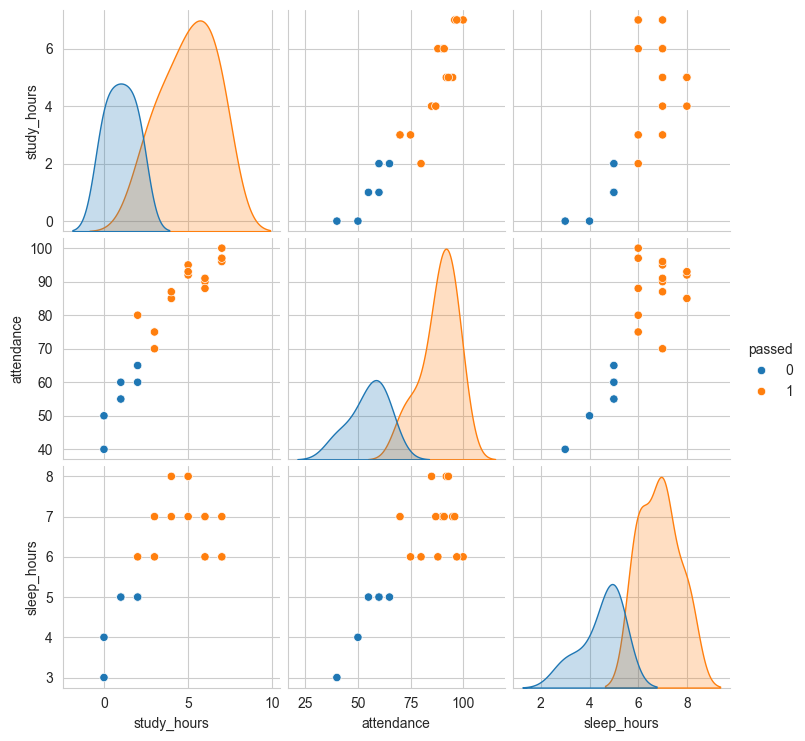

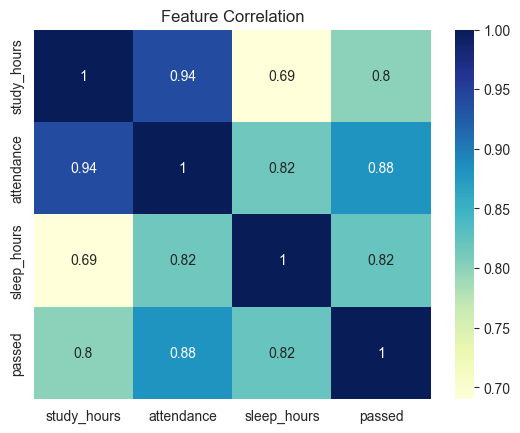


Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Prediction: Pass


In [2]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset
df = pd.read_csv("student_performance.csv")
print(df.head())

# Step 2: Data Visualization
sns.pairplot(df, hue='passed')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation")
plt.show()

# Step 3: Data Preparation
X = df[['study_hours', 'attendance', 'sleep_hours']]
y = df['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Prediction for New Data
import pandas as pd

new_student = pd.DataFrame([[4, 85, 6]], columns=['study_hours', 'attendance', 'sleep_hours'])
result = model.predict(new_student)
print("Prediction:", "Pass" if result[0] == 1 else "Fail")

#new_student = [[4, 85, 6]]  # Example: 4 hours study, 85% attendance, 6 hours sleep
#result = model.predict(new_student)
#print("\nPrediction for new student:", "Pass" if result[0] == 1 else "Fail")
